<a href="https://colab.research.google.com/github/omkarswami/trading-gear/blob/main/important_levels_identification/volume_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for analysing important price levels on a price-volume chart

Import dependencies first

#### Here we require :
- Pandas : for csv file reading and dataframe operations
- datetime : for basic date and time manipulation
- matplotlib : for plotting important levels on the 2d chart
- numpy : for basic array operations on price levels
- sys : for taking command line arguments
- os : for file input

In [14]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

#### Function for converting price - volume dataframe on chart into price bands - volumes dataframe
This function converts price volume candle stick data in to array of price ranges mapped with total volume of transactions that have closed in that price range. ***More candles closed in a particular range (price-band) more is the volume.*** Such high volume price bands are to be identified for important levels in the trading


In [15]:
# function converts price volume dataframe into levels dataframe
def get_delivery_profile(pv_dataframe):
    ltp=pv_dataframe.iloc[-1,4]
    percent_array=np.arange(-5.0,5.0,0.25)
    print(percent_array)
    levels_array=[]
    for e in percent_array:
        levels_array.append((ltp+(e/100)*ltp))
    levels_array=sorted(levels_array)
    profile_result_col=["Lower Level","Upper Level","Volume","Label"]
    profile_result=pd.DataFrame(columns=profile_result_col)
    i=0
    while i < (len(levels_array)-1):
        deliverable_total_records=pv_dataframe[(pv_dataframe["Close"]>=levels_array[i])&(pv_dataframe["Close"]<levels_array[i+1])]
        deliverable_total=deliverable_total_records["Volume"].sum()
        label=str(percent_array[i])+'to'+str(percent_array[i+1])+'%'+"("+str(round(levels_array[i],2))+"-"+str(round(levels_array[i+1],2))+")"
        entry_row=[levels_array[i],levels_array[i+1],deliverable_total,label]
        profile_result.loc[i]=entry_row
        i=i+1
    color_codes= get_color_codes(profile_result["Volume"].tolist())
    profile_result["Color Code"]=color_codes
    print(profile_result)
    return profile_result


#### Function for getting color codes for price levels - volume data
This function converts price band - volume data in to array of price bands mapped with color codes. The color codes mapped to a specific price range.***More the volume in darker the color, lesser the volume color is faded to that extent.***


In [16]:
def get_color_codes(volume_profile_array):
    shades=['#ffffff','#eae7e8','#d5cfd2','#c1b7bc','#ac9fa6','#988890','#83707a','#6e5864','#5a404e','#452838','#311122']
    color_codes=[]
    min_del=min([i for i in volume_profile_array if i > 0])
    ratio_list=list(map(lambda x:x/min_del, volume_profile_array))
    divisor=max(ratio_list)/10
    mapped_range=list(map(lambda x:round(x/divisor),ratio_list))
    color_codes=list(map(lambda x:shades[x],mapped_range))
    print(color_codes)
    return color_codes


#### Main code for running
folder_path is the path where price volume data files are stored related to current file. Here path is "/downloads" means folder is in same path as ***current*** code/notebook with name ***downloads***

In [17]:
plt.style.use('dark_background')  #remove this line for using matplot lib regular theme
folder_path="downloads/"
file_path="" #initially blank


#### option is file name for which you are running the program use google colab option here or hard code the option value
***option is filename of data file or part of filename if filename is RELIANCE-PRICE-VOL.csv use RELIANCE-PRICE-VOL.csv or RELIANCE. If multiple files have RELIANCE in their name use specific file name***

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#d5cfd2', '#eae7e8', '#d5cfd2', '#c1b7bc', '#d5cfd2', '#d5cfd2', '#ac9fa6', '#eae7e8', '#eae7e8', '#988890', '#83707a', '#311122', '#6e5864', '#452838', '#311122', '#988890', '#d5cfd2', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']
     Lower Level   Upper Level      Volume                            Label  \
0   17320.352500  17365.932375         0.0  -5.0to-4.75%(17320.35-17365.93)   
1   17365.932375  17411.512250         0.0  -4.75to-4.5%(17365.93-17411.51)   
2   17411.512250  17457.092125         0.0  -4.5to-4.25%(17411.51-17457.09)   
3   17457

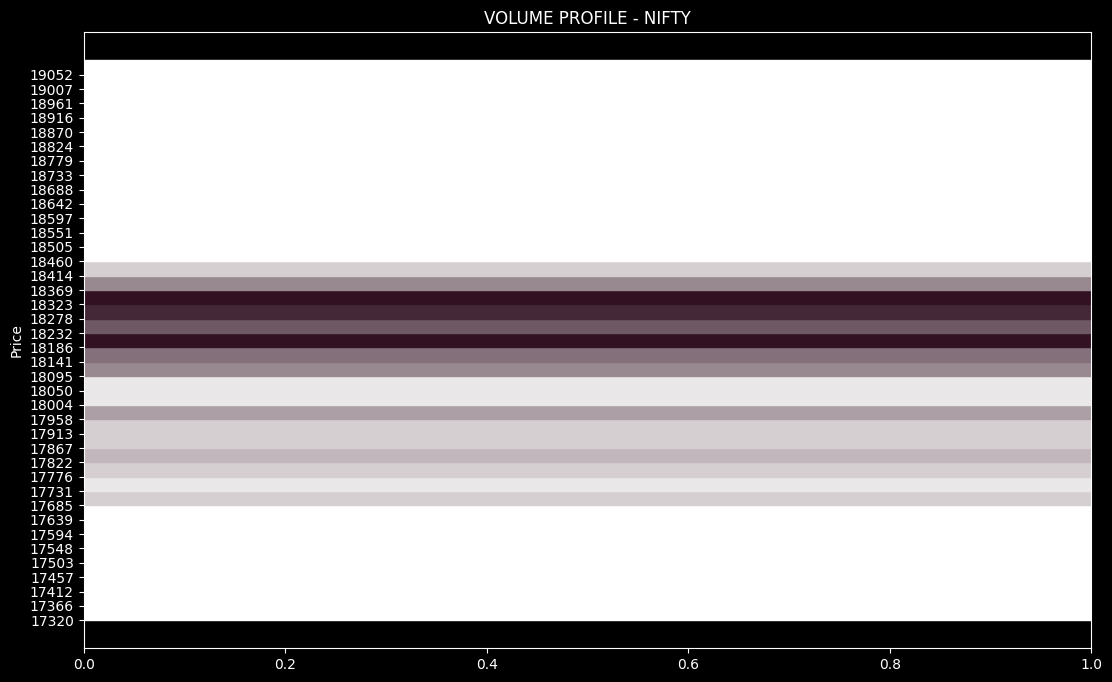

In [18]:

option = "NIFTY" #@param {type:"string"}

for i in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path,i)) and option in i:
        file_path=os.path.join(folder_path,i)
if file_path=="":
    print("FILE DOES NOT EXIST PLEASE DOWNLOAD FILE OF STOCK.") #in case the file is not present
else:    
    df = pd.read_csv(file_path)        
    volume_profile=get_delivery_profile(df)
    fig, ax1 = plt.subplots()
    for index, row in volume_profile.iterrows():
        ax1.axhspan(ymin=row["Lower Level"],ymax=row["Upper Level"],color=row["Color Code"])
    ax1.set_title('VOLUME PROFILE - '+option)
    ax1.set_ylabel('Price')
    ax1.set_yticks(volume_profile["Lower Level"])
    fig.set_size_inches(13,8)
    plt.show()